# Import Data & Libraries

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split   
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


palette = ["#00203FFF", "#ADEFD1FF"]

color_palette = sns.color_palette(palette)
import warnings                  
warnings.filterwarnings("ignore")

In [4]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report


# Load Data

In [5]:
data = pd.read_csv(r"D:\Coding\Project\Final Credit card fraud detection Project\Final Project\creditcard_2023.csv")

In [6]:
data.drop('id',axis = 1 , inplace = True)

In [7]:
data.shape

(568630, 30)

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [10]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# Data PreProcessing

In [11]:
data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.duplicated().any()

True

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568629 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568629 non-null  float64
 1   V2      568629 non-null  float64
 2   V3      568629 non-null  float64
 3   V4      568629 non-null  float64
 4   V5      568629 non-null  float64
 5   V6      568629 non-null  float64
 6   V7      568629 non-null  float64
 7   V8      568629 non-null  float64
 8   V9      568629 non-null  float64
 9   V10     568629 non-null  float64
 10  V11     568629 non-null  float64
 11  V12     568629 non-null  float64
 12  V13     568629 non-null  float64
 13  V14     568629 non-null  float64
 14  V15     568629 non-null  float64
 15  V16     568629 non-null  float64
 16  V17     568629 non-null  float64
 17  V18     568629 non-null  float64
 18  V19     568629 non-null  float64
 19  V20     568629 non-null  float64
 20  V21     568629 non-null  float64
 21  V22     568629 

# EDA Analysis

In [15]:
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]}) 

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,) 
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()

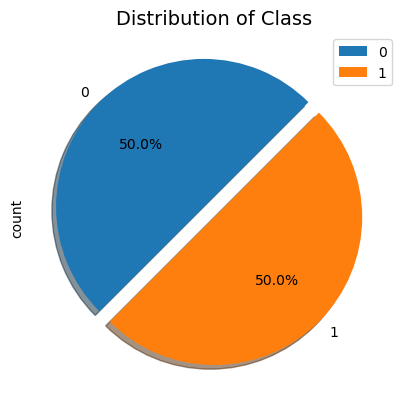

In [16]:
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

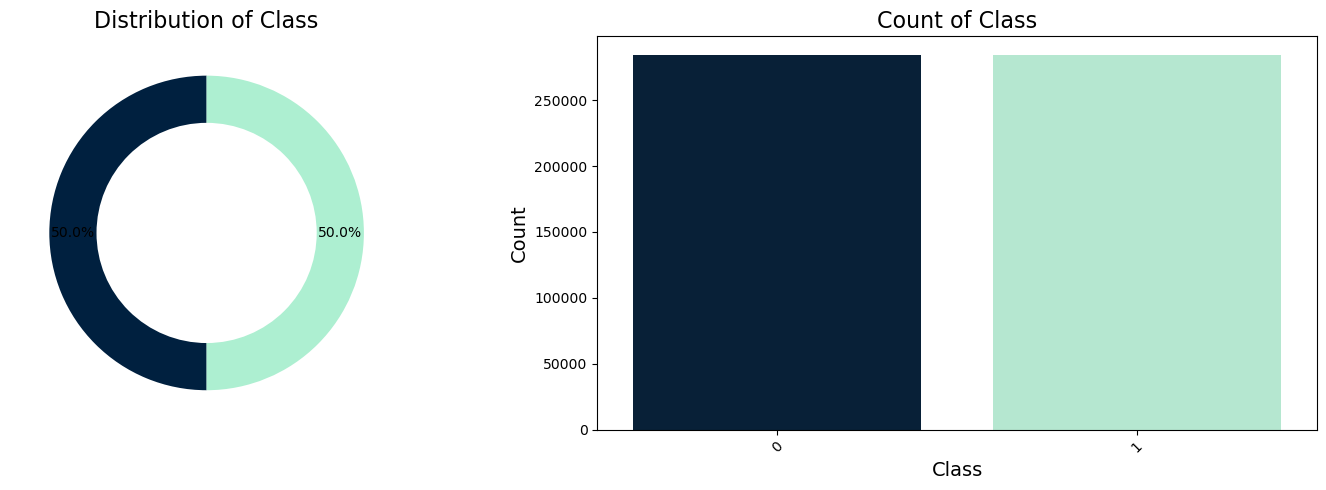

In [17]:
single_plot_distribution('Class',data)

<Axes: >

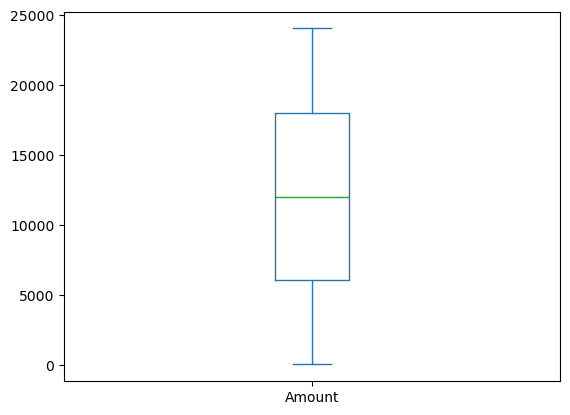

In [18]:
data['Amount'].plot.box()

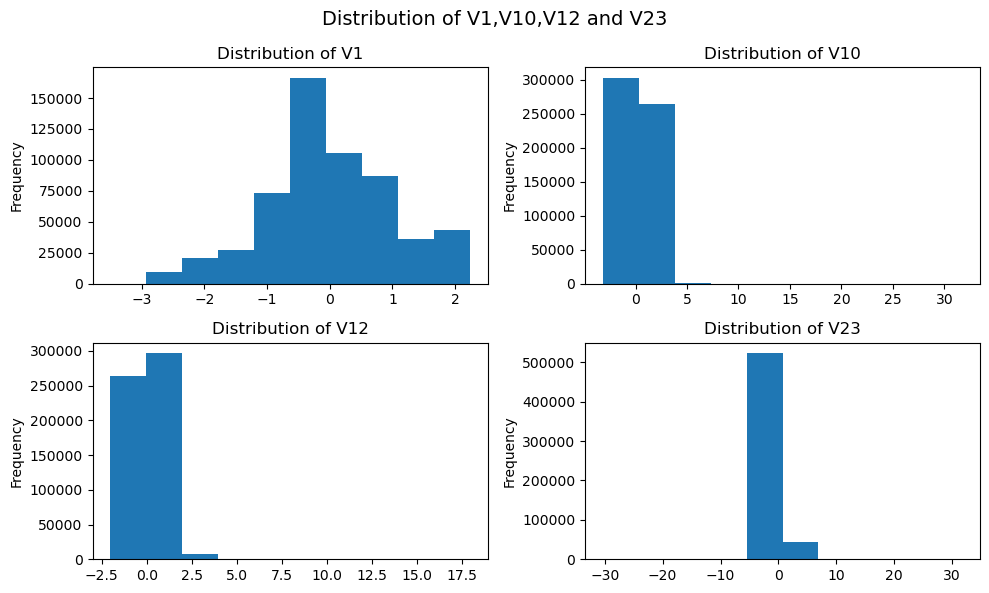

In [19]:
paper, axes = plt.subplots(2, 2, figsize=(10, 6))
data['V1'].plot(kind='hist', ax=axes[0,0], title='Distribution of V1')
data['V10'].plot(kind='hist', ax=axes[0,1], title='Distribution of V10')
data['V12'].plot(kind='hist', ax=axes[1,0], title='Distribution of V12')
data['V23'].plot(kind='hist', ax=axes[1,1], title='Distribution of V23')
plt.suptitle('Distribution of V1,V10,V12 and V23',size=14)
plt.tight_layout()
plt.show()

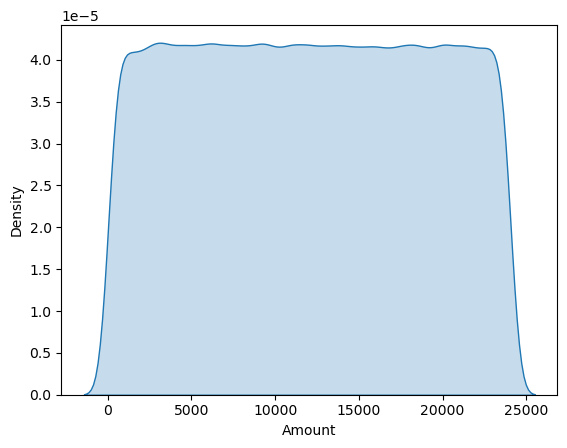

In [20]:
sns.kdeplot(data=data['Amount'],shade=True)
plt.show()

# Outlier Detection

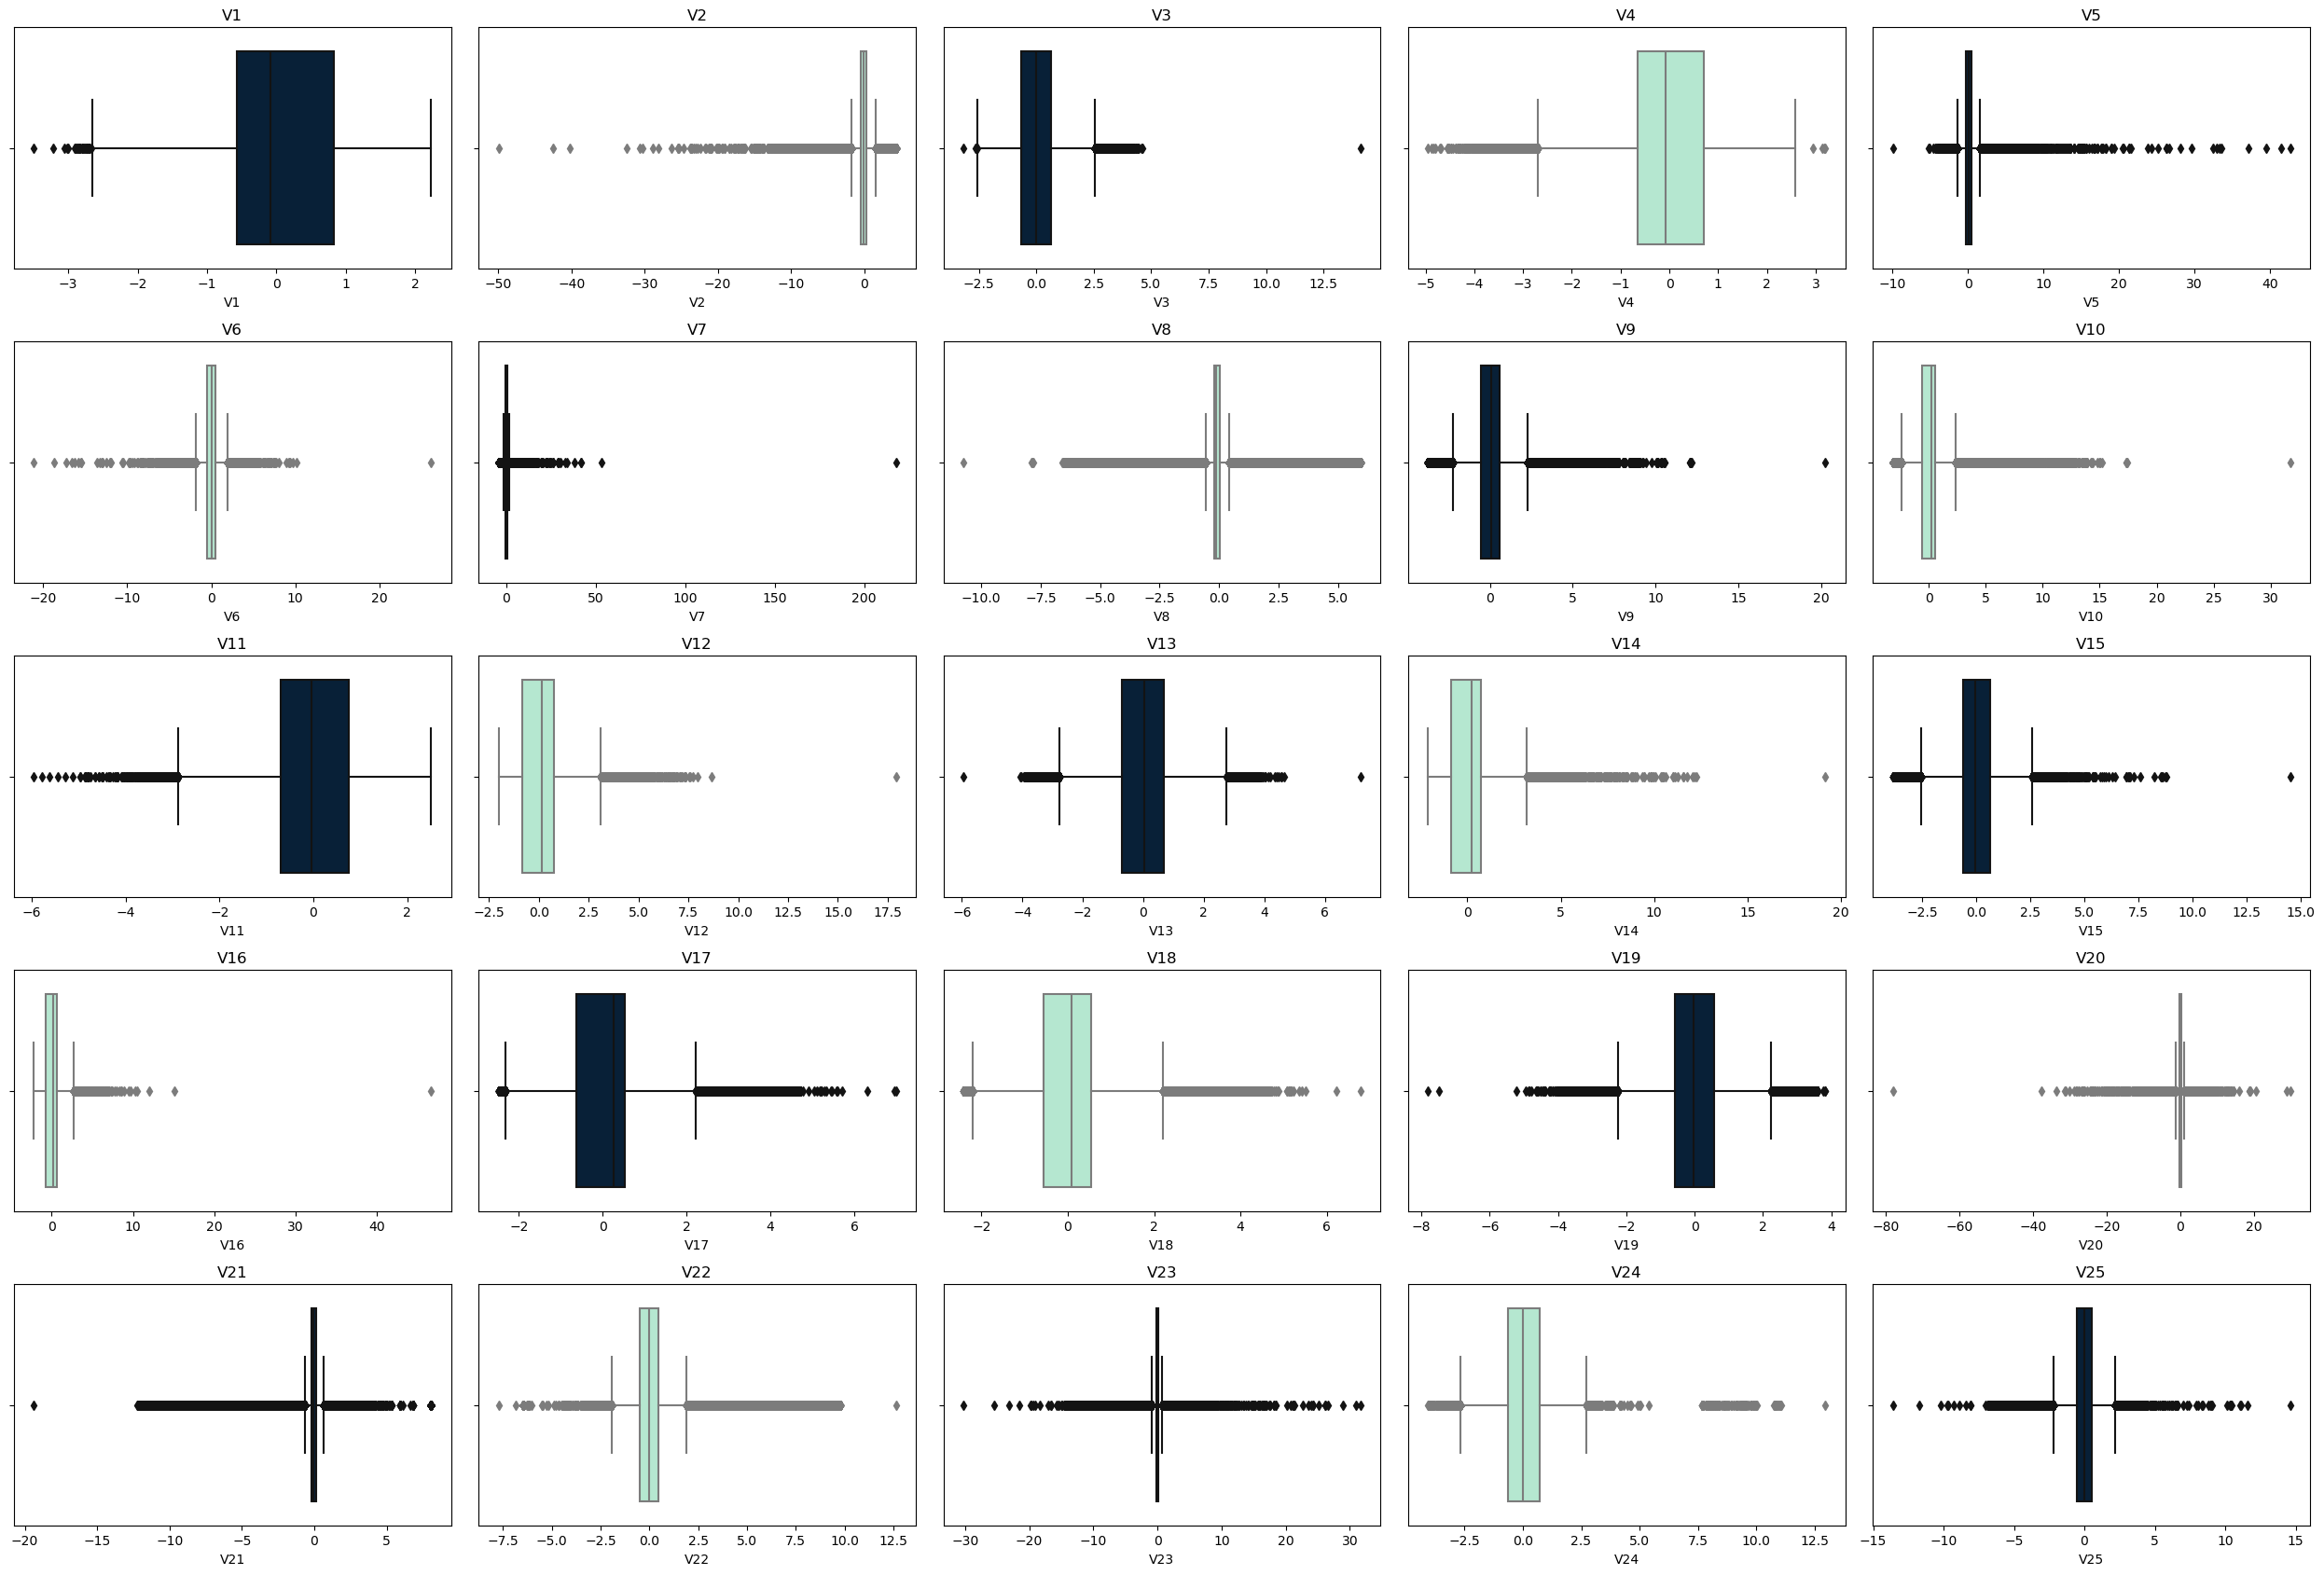

In [21]:
NUM_COLS_F =[col for col in data.columns if data[col].dtype == 'float']
fig, axes = plt.subplots(5, 5, figsize=(25, 17))

axes = axes.flatten()
for i, col in enumerate(NUM_COLS_F[:5 * 5]):
    sns.boxplot(x=data[col], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(col)

for i in range(len(NUM_COLS_F), 5 * 5):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Correlation Analysis of Dataset

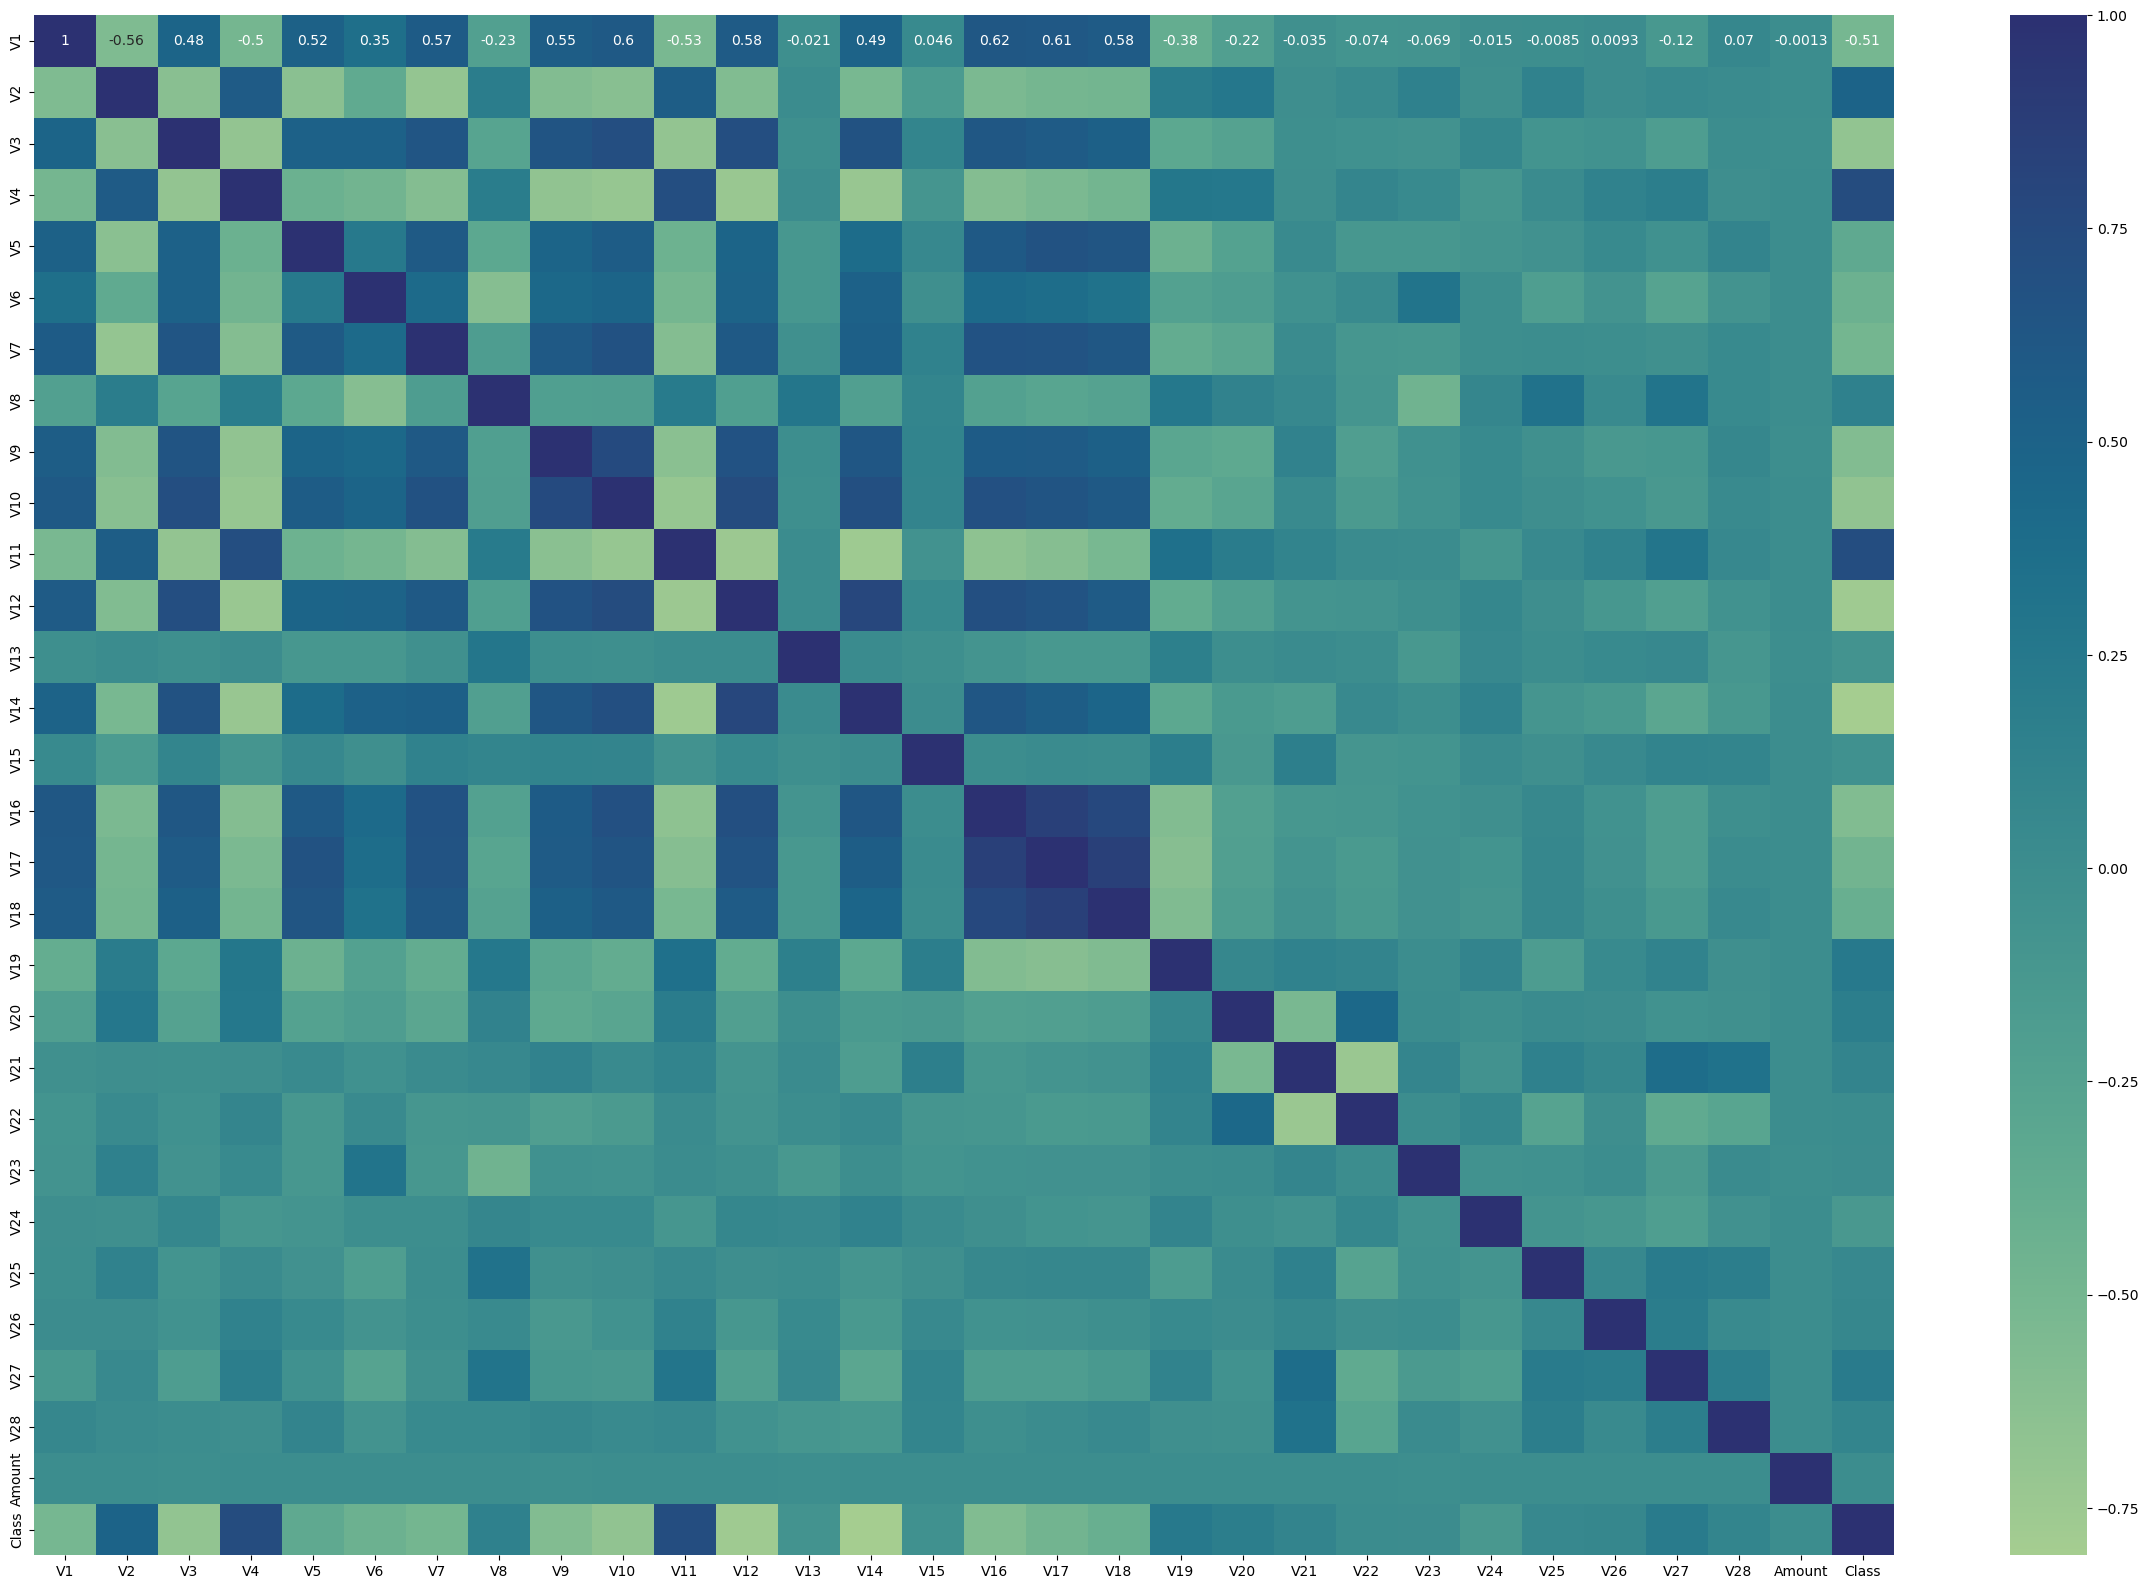

In [22]:
paper = plt.figure(figsize=[30,20])
sns.heatmap(data.corr(),cmap='crest',annot=True)
plt.show()

In [23]:
data.skew()

V1        -0.083418
V2        -1.397993
V3         0.014619
V4        -0.044166
V5         1.506412
V6        -0.201658
V7        19.027130
V8         0.300354
V9         0.171059
V10        0.740411
V11       -0.020887
V12        0.066756
V13        0.014908
V14        0.207832
V15        0.011231
V16        0.266405
V17        0.373058
V18        0.129188
V19       -0.010172
V20       -1.556427
V21       -0.109890
V22        0.319002
V23       -0.100113
V24        0.066086
V25        0.023010
V26       -0.018960
V27        2.755469
V28        1.724991
Amount     0.001657
Class      0.000004
dtype: float64

# Observations

*Few features have high co-relation among different features.

V17 and V18 are higly co-related.

V16 and V17 are higly co-related.

V14 has a negative corelation with V4.

V12 is also negatively co-related with V10 and V11.

V11 is ngetively co-related with V10 and positvely with V4.

V3 is positevely co-related with V10 and V12.

V9 and V10 are also positively co-related.


Amount is fairly Normally distributed.

# Data Preprocess 

In [24]:
x = data.drop(['Class'],axis=1)
y = data.Class

In [25]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [26]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (568629, 29)
Shape of y (568629,)


In [27]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260651,-0.469646,2.496265,-0.083723,0.129680,0.732910,0.519012,-0.130021,0.727159,0.637733,...,0.091196,-0.110544,0.217603,-0.134788,0.165957,0.126280,-0.434824,-0.081228,-0.151042,0.858451
1,0.985098,-0.356042,0.558054,-0.429653,0.277139,0.428614,0.406464,-0.133133,0.347452,0.529807,...,-0.233995,-0.194933,-0.605794,0.079483,-0.577397,0.190090,0.296502,-0.248050,-0.064508,-0.796368
2,-0.260275,-0.949385,1.728536,-0.457985,0.074060,1.419499,0.743510,-0.095590,-0.261296,0.690706,...,0.361650,-0.005006,0.702920,0.945089,-1.154668,-0.605563,-0.312895,-0.300256,-0.244715,-1.377010
3,-0.152155,-0.508957,1.746839,-1.090176,0.249484,1.143327,0.518266,-0.065143,-0.205697,0.575229,...,-0.378236,-0.146921,-0.038225,-0.214044,-1.893133,1.003963,-0.515950,-0.165314,0.048428,-0.962118
4,-0.206823,-0.165276,1.527051,-0.448291,0.106123,0.530559,0.658848,-0.212677,1.049920,0.968044,...,0.247233,-0.106976,0.729742,-0.161660,0.312559,-0.414115,1.071124,0.023714,0.419122,0.323288


# Modeling

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.25,random_state=15,stratify= y)

In [29]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426471, 29)
(142158, 29)
(426471,)
(142158,)


## 1st model Logical regeresion

In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [32]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

In [33]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_lr_train)

-------Training Accuracy---------
Model Accuracy is:  0.97
[[208618   4618]
 [ 10297 202938]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    213236
           1       0.98      0.95      0.96    213235

    accuracy                           0.97    426471
   macro avg       0.97      0.97      0.97    426471
weighted avg       0.97      0.97      0.97    426471



In [34]:
print('-------Test Accuracy---------')
model_eval(y_test, preds_lr_test)

-------Test Accuracy---------
Model Accuracy is:  0.96
[[69540  1539]
 [ 3514 67565]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71079
           1       0.98      0.95      0.96     71079

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158



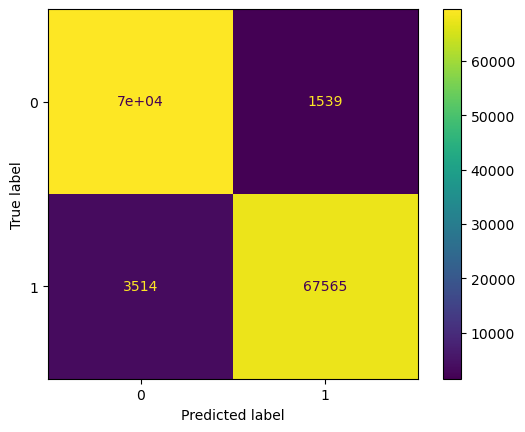

In [35]:
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test , cmap = "viridis")

plt.show()

# Desition Tree model

In [36]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [38]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_dtree_train)

-------Training Accuracy---------
Model Accuracy is:  1.0
[[213236      0]
 [     0 213235]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213235

    accuracy                           1.00    426471
   macro avg       1.00      1.00      1.00    426471
weighted avg       1.00      1.00      1.00    426471



In [39]:
print('-------Test Accuracy---------')
model_eval(y_test,preds_dtree_test)

-------Test Accuracy---------
Model Accuracy is:  1.0
[[70867   212]
 [   92 70987]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



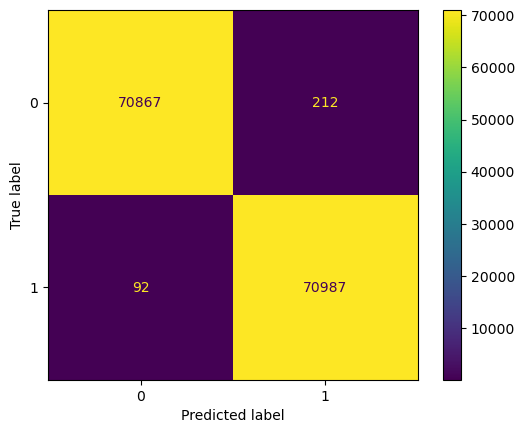

In [40]:
ConfusionMatrixDisplay.from_estimator(dtree, x_test, y_test , cmap = "viridis")

plt.show()

# Random Forest

In [41]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [43]:
print('-------Training Accuracy---------')
model_eval(y_train, preds_rf_train)

-------Training Accuracy---------
Model Accuracy is:  1.0
[[213236      0]
 [     0 213235]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213235

    accuracy                           1.00    426471
   macro avg       1.00      1.00      1.00    426471
weighted avg       1.00      1.00      1.00    426471



In [44]:
print('-------Test Accuracy---------')
model_eval(y_test, preds_rf_test)

-------Test Accuracy---------
Model Accuracy is:  1.0
[[71061    18]
 [    0 71079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



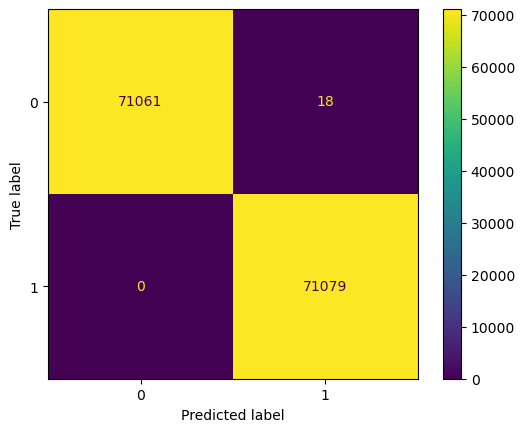

In [45]:
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test , cmap = "viridis")

plt.show()

##  XGBOOST 

In [46]:
import xgboost as xgb

In [47]:
xgclf = xgb.XGBRFClassifier()
xgclf.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [48]:
preds_xgb_train = xgclf.predict(x_train)
preds_xgb_test = xgclf.predict(x_test)

In [49]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_xgb_train)

-------Training Accuracy---------
Model Accuracy is:  0.97
[[209598   3638]
 [  9527 203708]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    213236
           1       0.98      0.96      0.97    213235

    accuracy                           0.97    426471
   macro avg       0.97      0.97      0.97    426471
weighted avg       0.97      0.97      0.97    426471



In [50]:
print('-------Test Accuracy---------')
model_eval(y_test,preds_xgb_test)

-------Test Accuracy---------
Model Accuracy is:  0.97
[[69867  1212]
 [ 3196 67883]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.96      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



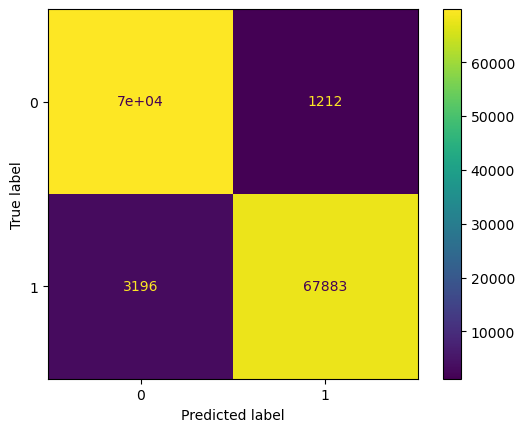

In [51]:
ConfusionMatrixDisplay.from_estimator(xgclf, x_test, y_test , cmap = "viridis")

plt.show()

# Hyper Tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
param_dist_xgb = {
    'n_estimators': [50,100,150,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}

In [54]:
xgb_clf = RandomizedSearchCV(xgclf,param_dist_xgb,verbose = 2)

In [55]:
xgb_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   2.1s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   1.9s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   2.2s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   2.2s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   3.5s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   3.7s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   3.8s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   3.9s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   3.7s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=150; total time=   2.3s
[CV] END ...learning_rate=0.2, max_depth=3, n_es

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             random_state=None, reg_alpha=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400]},
                   verbose=2)

In [56]:
print('Best Parameters for XG Boost :',xgb_clf.best_params_)

Best Parameters for XG Boost : {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1}


In [57]:
preds_xgb_clf_train = xgb_clf.predict(x_train)
preds_xgb_clf_test = xgb_clf.predict(x_test)

In [58]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_xgb_clf_train)

-------Training Accuracy---------
Model Accuracy is:  0.97
[[209756   3480]
 [  9493 203742]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    213236
           1       0.98      0.96      0.97    213235

    accuracy                           0.97    426471
   macro avg       0.97      0.97      0.97    426471
weighted avg       0.97      0.97      0.97    426471



In [59]:
print('-------Test Accuracy---------')
model_eval(y_test,preds_xgb_clf_test)

-------Test Accuracy---------
Model Accuracy is:  0.97
[[69924  1155]
 [ 3204 67875]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.95      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



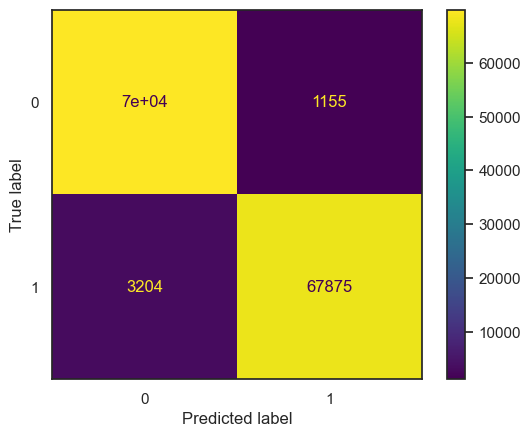

In [60]:
sns.set(style = "white")

ConfusionMatrixDisplay.from_estimator(xgb_clf, x_test, y_test , cmap = "viridis")

plt.show()

In [61]:
xgclf.predict([[-0.206819521,0.165280204,1.527052678,-0.448292663,0.106125114,0.530548862,0.658849134,0.212660011,1.049920839,
                0.968046108,1.203171107,1.029577424,1.439310226,-0.241453999,0.7854,0.22453,-0.366466196,0.291781553,0.46709,
                0.247237013,0.106984018,0.729727387,0.161665704,0.31256101,-0.414116194,1.071125586,0.3711599,-0.419117267,1427.97]])

array([0])

In [64]:
xgclf.predict([[0.860970878,0.255998591,-0.58834831,1.090526191,0.304431584,-0.486188263,-0.053015001,-0.047650762,-0.597427522,
                -0.334873801,0.6444365,-0.697295362,-1.310312357,-1.07439945,-1.339666542,-0.062907554,-0.131740318,0.169214148,
                -1.435734037,0.03338563,0.028880403,-0.276880028,-0.068483811,-0.502279639,0.407607065,0.351644362,0.46719801,
                0.619256913,14926.12]])

array([1])

In [62]:
import joblib

In [63]:
joblib.dump(xgclf,"CreditCardFraudDetection.pkl")

['CreditCardFraudDetection.pkl']